# Computer Project1

In [1]:
import numpy as np
import pandas
import matplotlib
from matplotlib import pyplot as plt 

<font size=5 >**Problem1**</font>

In [62]:
# Problem1
trials=[100,1000,10000,100000]
print("PI is: %f"%(np.pi))
for n in trials:
    distance=np.random.uniform(0,1 / 2,n)
    radian=np.random.uniform(0, np.pi / 2,n)
    cross_num=np.sum(0.5 * np.sin(radian) > distance)
    simulation = 2 / ( cross_num / n)
    error = np.abs(simulation/np.pi - 1)
    print("%d trials, PI is %f, error is %f"%(n,simulation,error))

PI is: 3.141593
100 trials, PI is 2.857143, error is 0.090543
1000 trials, PI is 3.316750, error is 0.055754
10000 trials, PI is 3.140210, error is 0.000440
100000 trials, PI is 3.139028, error is 0.000817


<font size=5 >**Problem2**</font>

In [1]:
#Problem2

$ P(n) = \frac{365！}{(365-n)!}\times \frac{1}{365^n} $

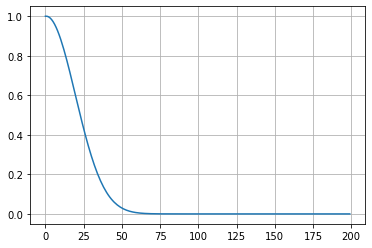

In [28]:
#calculate
def p(n):
    return np.exp(np.log(np.arange(1,365+1)).sum() - np.log(np.arange(1,365-n+1)).sum() - n*np.log(365))
calculation = np.empty(200)
num = np.empty(200,dtype=int)
for i in range(0,200):
    calculation[i] = p(i)
    num[i] = i
plt.grid()
plt.plot(num,calculation)
plt.show()

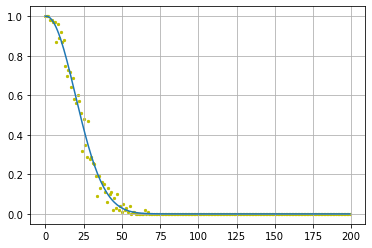

In [61]:
#simulate
def simulate(n, trials):
    count = 0
    for i in range(trials):
        birthdays = np.random.randint(0,365,size = n)
        if len(np.unique(birthdays)) == len(birthdays):
            count += 1
    return count/trials
simulation = np.empty(200)
trials = 100
for i in range(0,200):
    simulation[i] = simulate(i,trials)
plt.scatter(num,simulation,marker='o',c='y',s=5)
plt.plot(num,calculation)
plt.grid()
plt.show()

<font size=5 >**Problem3**</font>

In [33]:
#Problem3
from scipy.special import comb

$p=\frac{\tbinom{4}{3}\times \tbinom{48}{4}}{\tbinom{52}{7}}$

In [42]:
#calculate
p = comb(4,3)*comb(48,4)/comb(52,7)
p

0.005817711700064641

In [69]:
#simulate
kings = np.array([12,25,38,51])
cards = np.arange(52)
trials = 10000
count = 0
for i in range(trials):
    np.random.shuffle(cards)
    if len(np.intersect1d(kings,cards[0:7])) == 3:
        count=count+1
print("%d trials, simulation is %f" %(trials,count / trials))
print("calulation is %f" %p)

10000 trials, simulation is 0.005400
calulation is 0.005818


<font size=5 >**Problem4**</font>

In [70]:
#Problem4

$\int^{1}_{0}{\frac{1}{x+1}dx} = ln2\approx0.69314718$

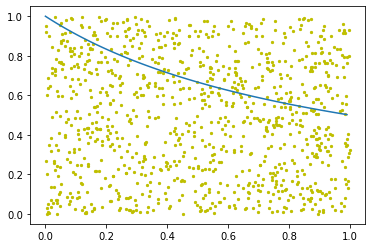

In [77]:
#simulate
trials = 1000
points=np.random.uniform(0,1,[2,trials])
simulation = np.sum( points[1,:] < 1/(1+points[0,:]) )/trials
x = np.arange(0,1,0.01)
y = 1/(1+x)
plt.plot(x,y)
plt.scatter(points[0],points[1],marker='o',c='y',s=5)
plt.show()


In [83]:
error = np.abs(simulation/np.log(2) - 1)
print("%d trials, simulation to ln2 is: %f, error is %f"%(trials,simulation,error))

1000 trials, simulation to ln2 is: 0.702000, error is 0.012772


<font size=5 >**Problem5**</font>

In [2]:
#Problem5
#calculate
import pandas as pd
print("The result should be:\nPa = 0.5\nPb = 0.25\nPc = 0.5\nPd = 0 \nPe = 0.5")

The result should be:
Pa = 0.5
Pb = 0.25
Pc = 0.5
Pd = 0 
Pe = 0.5


In [119]:
#simulation
trials = 1000
# HEAD :1 TAIL:0
toss_results = pd.DataFrame(np.random.randint(0,2,[n,3]))
#a
total = toss_results[(toss_results[0] == 1)]
Pa = np.sum(total.sum(axis = 1) == 2) / np.size(total,0)
print("%d trials, simulation to Pa is: %f"%(trials,Pa))

1000 trials, simulation to Pa is: 0.498510


In [120]:
#b
total = toss_results[(toss_results[0] == 0)]
Pb = np.sum(total.sum(axis = 1) == 2) / np.size(total,0)
print("%d trials, simulation to Pa is: %f"%(trials,Pb))

1000 trials, simulation to Pa is: 0.250325


In [127]:
#c
total = toss_results[toss_results[0] == 1]
total = total[total[1] == 1]
Pc = np.size(total[total[2] == 0],0)/ np.size(total,0)
print("%d trials, simulation to Pc is: %f"%(trials,Pc))

1000 trials, simulation to Pc is: 0.498135


In [132]:
#d
total = toss_results[toss_results[0] == 0]
total = total[total[1] == 0]
Pd = np.sum(total.sum(axis = 1) == 2) / np.size(total,0)
print("%d trials, simulation to Pd is: %f"%(trials,Pd))

1000 trials, simulation to Pd is: 0.000000


In [134]:
#e
total = toss_results[toss_results[0] == 1]
total = total[total[2] == 1]
Pe = np.sum(total.sum(axis = 1) == 2) / np.size(total,0)
print("%d trials, simulation to Pe is: %f"%(trials,Pe))

1000 trials, simulation to Pe is: 0.499660


<font size=5 >**Problem6**</font>

In [136]:
#Problem6

$p=\frac{\tbinom{4}{1}\times \tbinom{2}{1}}{\tbinom{6}{2}}$

In [137]:
#calculate
p = comb(4,1)*comb(2,1)/comb(6,2)
p

0.5333333333333333

In [140]:
#simulation
trials=1000
a=np.array([0,0,1,0,0,1])
count=0
for i in range(trials):
    np.random.shuffle(a)
    if a[:2].sum()==1:
        count=count+1
print("%d trials, simulation to p is: %f" %(trials,count/trials))

1000 trials, simulation to p is: 0.537000


<font size=5 >**Problem7**</font>

In [141]:
#Problem7

In [4]:
def log_factorial(n):
    a = np.arange(n)+1
    return np.sum(np.log(a))
def log_stirling(n):
    return 0.5*np.log(2*np.pi)+(n+0.5)*np.log(n)-n

In [19]:
n = np.arange(100)+1
log_f = np.array([])
log_s = np.array([])
for i in n:
    log_f = np.append(log_f, log_factorial(i))
    log_s = np.append(log_s, log_stirling(i))
data = {
    'N':n,
    'log(N!)':log_f,
    'stirling_simulation':log_s
} 
value = pd.DataFrame(data)
value.set_index(['N'],inplace = True)
value

,log(N!),stirling_simulation
N,,
1,0.000000,-0.081061
2,0.693147,0.651806
3,1.791759,1.764082
4,3.178054,3.157263
5,4.787492,4.770847
...,...,...
96,345.379407,345.378539
97,349.954118,349.953259
98,354.539086,354.538235


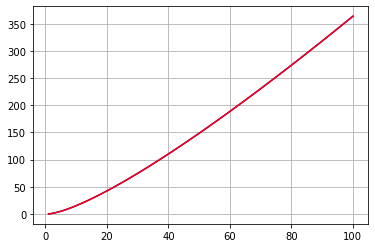

In [30]:
plt.plot(n,log_f,c='b')
plt.plot(n,log_s,c='r')
plt.grid()
plt.show()

In [31]:
print("The exact value of log(200!) is %f, simulation is %f" %(log_factorial(200),log_stirling(200)))

The exact value of log(200!) is 863.231987, simulation is 863.231571


<font size=5 >**Problem8**</font>

In [32]:
#Problem8

In [49]:
N = 1000
M = 100
p = 0.94
hyper = np.array([])
bino  = np.array([])
x = np.array([])
def C(n,r):
    return np.exp(log_factorial(n)-log_factorial(r)-log_factorial(n-r))

for k in range(95,101):
    hyper = np.append(hyper,C(p*N,k)*C((1-p)*N,M-k)/C(N,M))
    bino = np.append(bino,comb(M,k)*np.power(p,k)*np.power(1-p,M-k))
    print("k= %d, bino = %f, hyper = %f" %(k,bino[-1],hyper[-1]))

k= 95, bino = 0.163918, hyper = 0.184761
k= 96, bino = 0.133752, hyper = 0.142656
k= 97, bino = 0.086410, hyper = 0.085604
k= 98, bino = 0.041442, hyper = 0.037442
k= 99, bino = 0.013116, hyper = 0.010615
k= 100, bino = 0.002055, hyper = 0.001463


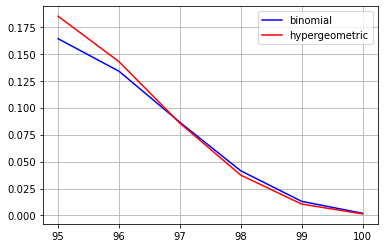

In [54]:
x = np.arange(95,101,1)
plt.plot(x,bino,c='b',label = 'binomial')
plt.plot(x,hyper,c='r',label = 'hypergeometric')
plt.legend()
plt.grid()
plt.show()

<font size=5 >**Problem9**</font>

In [55]:
#Problem9

$P=(0.75)^3=0.421875$

In [88]:
trials = 10000
count = 0
for i in range(trials):
    if np.random.randint(0,4) == 0:
        continue
    elif np.random.randint(0,4) == 0:
        continue
    elif np.random.randint(0,4) == 0:
        continue
    else:
        count+=1
print("%d trials , the simulation is %f"%(trials,count/trials))

10000 trials , the simulation is 0.421300


<font size=5 >**Problem10**</font>

In [89]:
#Problem10

In [92]:
def poisson(k):
    return np.exp(-1)/np.exp(log_factorial(k))
n = 100
p = 0.01
pois = np.array([])
bino  = np.array([])
x = np.array([])

for k in range(0,101):
    pois = np.append(pois,poisson(k))
    bino = np.append(bino,comb(n,k)*np.power(p,k)*np.power(1-p,n-k))
#     print("k= %d, binomial = %f, poisson = %f" %(k,bino[-1],pois[-1]))
data = {
    'k':np.arange(0,101),
    'binomial':bino,
    'poisson':pois
} 
value = pd.DataFrame(data)
value.set_index(['k'],inplace = True)
value

,binomial,poisson
k,,
0,3.660323e-01,3.678794e-01
1,3.697296e-01,3.678794e-01
2,1.848648e-01,1.839397e-01
3,6.099917e-02,6.131324e-02
4,1.494171e-02,1.532831e-02
...,...,...
96,3.766713e-186,3.709666e-151
97,1.568973e-189,3.824398e-153
98,4.851495e-193,3.902447e-155


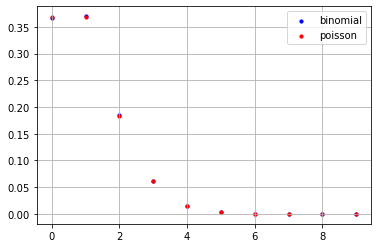

In [98]:
x = np.arange(0,10,1)
plt.scatter(x,bino[0:10],c='b',label = 'binomial', s=10)
plt.scatter(x,pois[0:10],c='r',label = 'poisson', s=10)
plt.legend()
plt.grid()
plt.show()

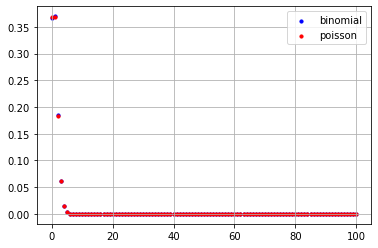

In [99]:
x = np.arange(0,101,1)
plt.scatter(x,bino,c='b',label = 'binomial', s=10)
plt.scatter(x,pois,c='r',label = 'poisson', s=10)
plt.legend()
plt.grid()
plt.show()

In [105]:
#(c)
realization = np.random.binomial(100,0.01,100)
realization

array([1, 0, 0, 2, 0, 2, 1, 1, 0, 0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 0, 2, 1,
       2, 2, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 2, 0, 1, 2, 2, 0, 0, 0, 2, 3, 1, 0, 0, 4, 1, 0, 1, 2, 2, 1,
       1, 0, 1, 3, 1, 1, 0, 2, 0, 0, 2, 1, 1, 0, 4, 0, 0, 4, 1, 1, 1, 1,
       0, 1, 2, 1, 3, 1, 1, 0, 2, 1, 0, 0])

<font size=5 >**Problem11**</font>

In [ ]:
#Problem11

$ P(X>\mu+a\sigma) = P(\frac{X-\mu}{\sigma}>a) = 1-P(\frac{X-\mu}{\sigma}<a)= 1-\Phi(a)  $

$1-\Phi(1)= 0.158655$</br>
$1-\Phi(2)= 0.022750$</br>
$1-\Phi(3)= 0.001350$

In [115]:
from scipy.stats import norm

In [119]:
mu = 0
sigma = 1
trials = 5000
sample=np.random.normal(mu,sigma,size=trials)
for i in range(1,4):
    print("when a= %d  simulation= %f, caculation = %f" %(i,sum(sample>mu+i*sigma)/trials,1-norm.cdf(i)))

when a= 1  simulation= 0.164800, caculation = 0.158655
when a= 2  simulation= 0.021600, caculation = 0.022750
when a= 3  simulation= 0.001200, caculation = 0.001350


<font size=5 >**Problem12**</font>

In [120]:
#Problem12

In [129]:
#Geometric
X = np.array([])
p=0.25
trials = 1000
for i in range(trials):
    x = 0
    while True:
        x += 1
        if np.random.uniform(0,1) <= p:
            break
    X = np.append(X,x)
print("p = %f, %d trials, simulation expectation = %f, simulation variance = %f" %(p,trials,np.mean(X),np.var(X)))

p = 0.250000, 1000 trials, simulation expectation = 4.028000, simulation variance = 11.637216


the expectation should be $\frac{1}{p}=4$</br>
the variance should be $\frac{1-p}{p^2}=12$</br>

In [132]:
U = np.random.uniform(0,1,trials)
Lambda = 5
X = -1 / Lambda * np.log(U)
print("Lambda = %f, %d trials, simulation expectation = %f, simulation variance = %f" %(p,trials,np.mean(X),np.var(X)))

Lambda = 0.250000, 1000 trials, simulation expectation = 0.193022, simulation variance = 0.041264


the expectation should be $\frac{1}{\lambda}=0.2$</br>
the variance should be $\frac{1}{\lambda^2}=0.04$</br>